
# Cleaning and Preprocessing Data for Machine Learning

In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

crime_df = pd.read_csv('../Resources/Los_Angeles/la_clean_data.csv')
crime_df.head()

,AreaName,CrimeCodeDescription,VictimAge
0,Harbor,ABORTION/ILLEGAL,26
1,Van Nuys,ABORTION/ILLEGAL,28
2,Central,ARSON,64
3,Central,ARSON,61
4,Central,ARSON,56


In [4]:
# Use Pandas get_dummies to convert categorical data

crime_df = pd.get_dummies(crime_df)
crime_df.head()

,VictimAge,AreaName_77th Street,AreaName_Central,AreaName_Harbor,AreaName_Hollenbeck,AreaName_Hollywood,AreaName_Mission,AreaName_N Hollywood,AreaName_Newton,AreaName_Northeast,...,CrimeCodeDescription_UNAUTHORIZED COMPUTER ACCESS,"CrimeCodeDescription_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","CrimeCodeDescription_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",CrimeCodeDescription_VANDALISM - MISDEAMEANOR ($399 OR UNDER),CrimeCodeDescription_VEHICLE - ATTEMPT STOLEN,CrimeCodeDescription_VEHICLE - STOLEN,CrimeCodeDescription_VIOLATION OF COURT ORDER,CrimeCodeDescription_VIOLATION OF RESTRAINING ORDER,CrimeCodeDescription_VIOLATION OF TEMPORARY RESTRAINING ORDER,CrimeCodeDescription_WEAPONS POSSESSION/BOMBING
0,26,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
crime_df.columns.tolist()

['VictimAge',
 'AreaName_77th Street',
 'AreaName_Central',
 'AreaName_Harbor',
 'AreaName_Hollenbeck',
 'AreaName_Hollywood',
 'AreaName_Mission',
 'AreaName_N Hollywood',
 'AreaName_Newton',
 'AreaName_Northeast',
 'AreaName_Olympic',
 'AreaName_Rampart',
 'AreaName_Southwest',
 'AreaName_Topanga',
 'AreaName_Van Nuys',
 'AreaName_West LA',
 'AreaName_West Valley',
 'AreaName_Wilshire',
 'CrimeCodeDescription_ABORTION/ILLEGAL',
 'CrimeCodeDescription_ARSON',
 'CrimeCodeDescription_ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 'CrimeCodeDescription_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'CrimeCodeDescription_ATTEMPTED ROBBERY',
 'CrimeCodeDescription_BATTERY - SIMPLE ASSAULT',
 'CrimeCodeDescription_BATTERY ON A FIREFIGHTER',
 'CrimeCodeDescription_BATTERY POLICE (SIMPLE)',
 'CrimeCodeDescription_BATTERY WITH SEXUAL CONTACT',
 'CrimeCodeDescription_BIKE - ATTEMPTED STOLEN',
 'CrimeCodeDescription_BIKE - STOLEN',
 'CrimeCodeDescription_BOAT - STOLEN',
 'CrimeCodeDescriptio

In [8]:
# Assign X (data) and y (target)
X = crime_df[['AreaName_Southwest','CrimeCodeDescription_BATTERY - SIMPLE ASSAULT']]
y = crime_df["VictimAge"].values.reshape(-1, 1)
print(X.shape, y.shape)

(163222, 2) (163222, 1)


In [9]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

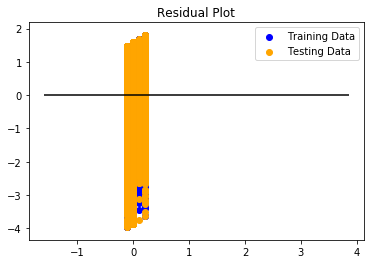

In [14]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [15]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(MSE)
print(r2)


1.0009889335924063
0.005597107864363182


In [16]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(MSE)
print(r2)

1.0012011018695528
0.00538633555576562


In [17]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(MSE)
print(r2)


1.0009889335884237
0.005597107868319573


In [18]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(MSE)
print(r2)


1.001050702107699
0.005535745757162314
